# Optica I - P1: Medidas Focales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sympy as sp

In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Paraxiales

In [4]:
parax = pd.read_csv('data/paraxiales.csv')

In [5]:
parax['a'] = -(parax['Objeto'] - parax['Lente'])
parax['a_prima'] = -(parax['Pantalla'] - parax['Lente'])

In [6]:
parax

,Objeto,Lente,Pantalla,Tamaño,a,a_prima
0,12.413,12.137,11.357,-0.057,-0.276,0.780
1,12.413,12.097,11.523,-0.036,-0.316,0.574
2,12.413,12.082,11.557,-0.032,-0.331,0.525
3,12.413,12.111,11.491,-0.042,-0.302,0.620
4,12.413,11.787,11.491,-0.009,-0.626,0.296
5,12.413,12.144,11.293,-0.065,-0.269,0.851
6,12.413,12.155,11.165,-0.078,-0.258,0.990
7,12.413,12.133,11.395,-0.054,-0.280,0.738
8,12.413,12.145,11.300,-0.064,-0.268,0.845
9,12.413,12.092,11.555,-0.034,-0.321,0.537


## Gauss

$$
- \frac{1}{a} + \frac{1}{a'} = \frac{1}{f} 
$$

In [7]:
from scipy.stats import linregress

x = 1/parax['a']
y = 1/parax['a_prima']

results = linregress(x, y)

slope = results.slope
intercept = results.intercept
r2 = results.rvalue**2

slope_error = results.stderr
intercept_error = results.intercept_stderr

print(f"Slope: {slope:.4f} ± {slope_error:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_error:.4f}")
print(f"R²: {r2:.4f}")

Slope: 1.0716 ± 0.0095
Intercept: 5.1656 ± 0.0286
R²: 0.9991


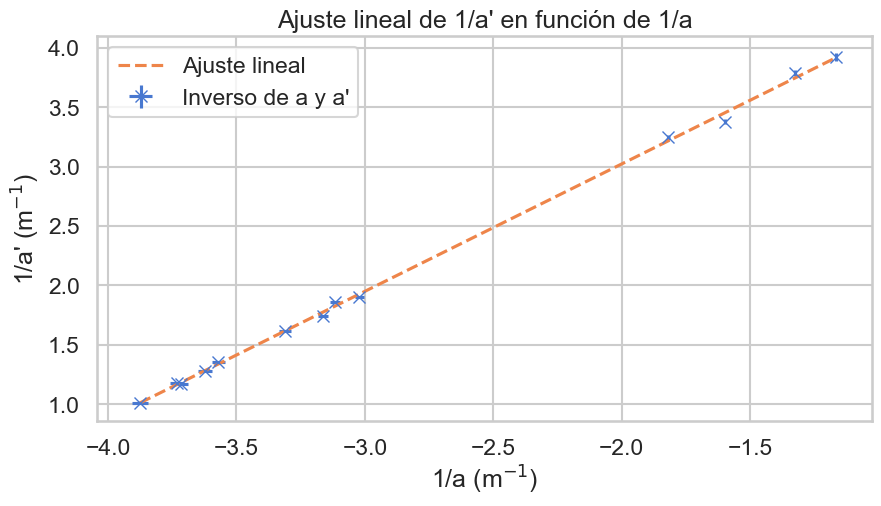

In [8]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('muted')

plt.figure(figsize=(10, 5))

X_new = np.linspace(x.min(), x.max(), 100)
Y_new = slope * X_new + intercept
plt.errorbar(1/parax['a'], 1/parax['a_prima'], xerr=abs(1/parax['a']**2)*0.002, yerr=abs(1/parax['a_prima']**2)*0.002, label='Inverso de a y a\'', fmt='x')
plt.plot(X_new, Y_new, '--', label='Ajuste lineal')

plt.xlabel('1/a (m$^{-1}$)')
plt.ylabel('1/a\' (m$^{-1}$)')
plt.title('Ajuste lineal de 1/a\' en función de 1/a')
plt.legend()

In [9]:
f = 0.187
f_teo = 0.2
print(f"Slope % error: {slope-1}")
print(f"Intercept % error: {(intercept-1/0.2)/(1/0.2)}")

Slope % error: 0.07159081131441791
Intercept % error: 0.03312242268289225


## Ec de Newton

In [10]:
parax['z'] = parax['a'] + f
parax['z_prima'] = parax['a_prima'] - f
parax['f_exp'] = f
parax

,Objeto,Lente,Pantalla,Tamaño,a,a_prima,z,z_prima,f_exp
0,12.413,12.137,11.357,-0.057,-0.276,0.780,-0.089,0.593,0.187
1,12.413,12.097,11.523,-0.036,-0.316,0.574,-0.129,0.387,0.187
2,12.413,12.082,11.557,-0.032,-0.331,0.525,-0.144,0.338,0.187
3,12.413,12.111,11.491,-0.042,-0.302,0.620,-0.115,0.433,0.187
4,12.413,11.787,11.491,-0.009,-0.626,0.296,-0.439,0.109,0.187
5,12.413,12.144,11.293,-0.065,-0.269,0.851,-0.082,0.664,0.187
6,12.413,12.155,11.165,-0.078,-0.258,0.990,-0.071,0.803,0.187
7,12.413,12.133,11.395,-0.054,-0.280,0.738,-0.093,0.551,0.187
8,12.413,12.145,11.300,-0.064,-0.268,0.845,-0.081,0.658,0.187
9,12.413,12.092,11.555,-0.034,-0.321,0.537,-0.134,0.350,0.187


Slope: 4.540513892665847 ± 0.06461801214078818
Intercept: -0.06146272730707225 ± 0.019629694505067755
R²: 0.9977770823242895


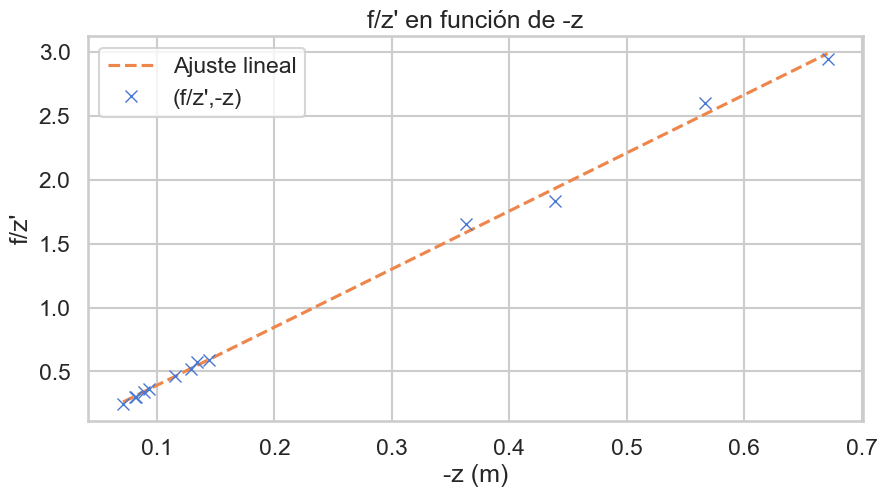

In [42]:
X = -parax['z']
y = 0.2/parax['z_prima']


results = linregress(X, y)

slope = results.slope
intercept = results.intercept
r2 = results.rvalue**2

slope_error = results.stderr
intercept_error = results.intercept_stderr	

print(f"Slope: {slope:} ± {slope_error:}")
print(f"Intercept: {intercept} ± {intercept_error}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 5))
X_new = np.linspace(X.min(), X.max(), 100)

plt.errorbar(X, y, label='(f/z\',-z)', fmt='x')
plt.plot(X_new, slope*X_new + intercept, '--', label='Ajuste lineal')


plt.xlabel('-z (m)')
plt.ylabel('f/z\'')
plt.title('f/z\' en función de -z')

plt.legend()

In [43]:
abs(slope - 1/0.2)/(1/0.2)

0.09189722146683063

In [45]:
print(f"Slope % error: {(slope-0)*100} %")
print(f"Intercept % error: {(intercept-f**2)/(f**2)*100} %")

Slope % error: 6.755332438615934e-28 %
Intercept % error: 3.9685972741040516e-14 %


## Aumento lateral

In [55]:
tamaño_real = 0.02
parax['Aumento'] = parax['Tamaño']/tamaño_real 
parax

,Objeto,Lente,Pantalla,Tamaño,a,a_prima,z,z_prima,f_exp,aumento,Aumento
0,12.413,12.137,11.357,-0.057,-0.276,0.780,-0.089,0.593,0.187,-2.85,-2.85
1,12.413,12.097,11.523,-0.036,-0.316,0.574,-0.129,0.387,0.187,-1.80,-1.80
2,12.413,12.082,11.557,-0.032,-0.331,0.525,-0.144,0.338,0.187,-1.60,-1.60
3,12.413,12.111,11.491,-0.042,-0.302,0.620,-0.115,0.433,0.187,-2.10,-2.10
4,12.413,11.787,11.491,-0.009,-0.626,0.296,-0.439,0.109,0.187,-0.45,-0.45
5,12.413,12.144,11.293,-0.065,-0.269,0.851,-0.082,0.664,0.187,-3.25,-3.25
6,12.413,12.155,11.165,-0.078,-0.258,0.990,-0.071,0.803,0.187,-3.90,-3.90
7,12.413,12.133,11.395,-0.054,-0.280,0.738,-0.093,0.551,0.187,-2.70,-2.70
8,12.413,12.145,11.300,-0.064,-0.268,0.845,-0.081,0.658,0.187,-3.20,-3.20
9,12.413,12.092,11.555,-0.034,-0.321,0.537,-0.134,0.350,0.187,-1.70,-1.70


Slope: -0.9238 ± 0.0074
Intercept: 0.9779 ± 0.0249
R²: 0.9993


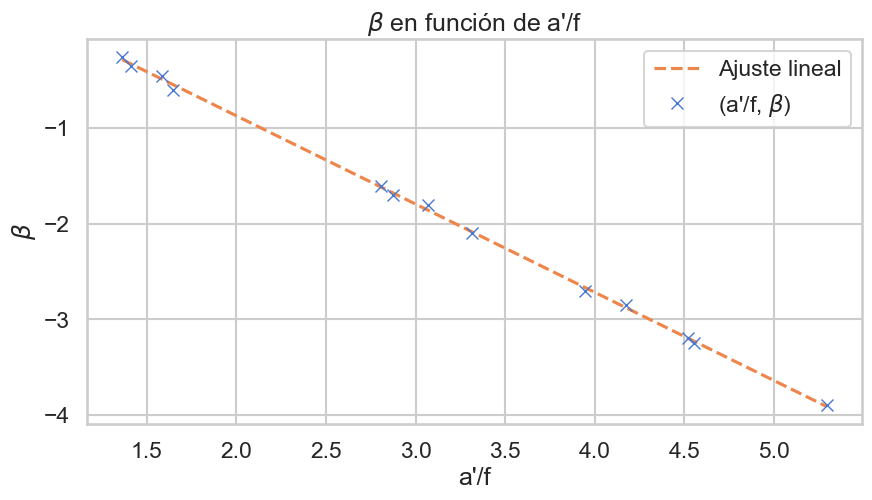

In [56]:
X = parax['a_prima']/f 
y = parax['Aumento']

results = linregress(X, y)

slope = results.slope
intercept = results.intercept
r2 = results.rvalue**2

slope_error = results.stderr
intercept_error = results.intercept_stderr

print(f"Slope: {slope:.4f} ± {slope_error:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_error:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(10, 5))
X_new = np.linspace(X.min(), X.max(), 100)

plt.errorbar(X, y, label='(a\'/f, $\\beta$)', fmt='x')
plt.plot(X_new, slope*X_new + intercept, '--', label='Ajuste lineal')

plt.xlabel('a\'/f')
plt.ylabel('$\\beta$')
plt.title('$\\beta$ en función de a\'/f')
plt.legend()

In [57]:
print(f"Error % pendiente: {abs(slope+1)*100} %")
print(f"Error % ordenada: {abs(intercept-1)*100} %")

Error % pendiente: 7.61611499833773 %
Error % ordenada: 2.2122583432310883 %
